In [1]:
#importing libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import math as math
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier

In [2]:
#reading excle file
df = pd.read_excel('Mini_protein_data_HA_BOT_combined_for_ml.xlsx')

In [3]:
#Seperating data [Features,Lables]
#tranforming data [Lable encoder and Robust Scaler; Feature selection; PCA Dimentional reduction]
X = df.drop(['Category','Category_0_1','Category_0-1_2_3_4','Category_0_1-2_3_4'], axis = 1)
Y = df['Category_0-1_2_3_4']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = RobustScaler().fit_transform(X)    
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(X,Y)
sfm = SelectFromModel(randomforest, prefit=True) #feature selection using select from 
X = sfm.transform(X)

In [4]:
#Ploting and Scoring Function
def plot_graphs(trainedalgo, X_Test, Y_Test, Y_hat):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(trainedalgo, X_Test, Y_Test,cmap=plt.cm.Blues,normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print(classification_report(Y_Test,Y_hat))
    import scikitplot as skplt
    y_probas_roc = trainedalgo.predict_proba(X_Test)
    roc = skplt.metrics.plot_roc(Y_Test, y_probas_roc,figsize=(45,45),text_fontsize=100,title_fontsize=150)   
    plt.xlabel('False Positive Rate', fontsize=160)
    plt.ylabel('True Positive Rate', fontsize=160)
    for l in roc.lines:
        l.set_lw(25)
    plt.show()
    #Average Precision score
    from sklearn.metrics import average_precision_score
    average_precision_rand = average_precision_score(Y_Test, Y_hat)
    print('Average precision-recall score Random forest: {0:0.2f}'.format(
          average_precision_rand))
    ## Curve for Randdom forrest
    y_probas = trainedalgo.predict_proba(X_Test)
    ax = skplt.metrics.plot_precision_recall(Y_Test, y_probas,figsize=(45,45),text_fontsize=80,title_fontsize=150)
    plt.xlabel('Recall', fontsize=160)
    plt.ylabel('Precision', fontsize=160)
    plt.xticks(fontsize=100)
    plt.yticks(fontsize=100)
    for l in ax.lines:
        l.set_lw(25)
    plt.show()    
    from sklearn.metrics import precision_recall_fscore_support
    precision_recall_fscore_support(Y_Test, Y_hat)

In [6]:
#Data Spliting [Training and Test]
X_train, X_val, y_train, y_val = train_test_split(X, Y, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (25617, 36) (25617,)
Validation set: (8540, 36) (8540,)


In [6]:
#KNN Classifier Testing
for k in range (15):
    k = k+1
    #Train Model and Predict  
    neighbour = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_predict_KNN = neighbour.predict(X_val)
    print("Test set Accuracy for k = " ,k," : " , accuracy_score(y_val, y_predict_KNN))


Test set Accuracy for k =  1  :  0.9037470725995316
Test set Accuracy for k =  2  :  0.9032786885245901
Test set Accuracy for k =  3  :  0.9182669789227166
Test set Accuracy for k =  4  :  0.9139344262295082
Test set Accuracy for k =  5  :  0.9192037470725996
Test set Accuracy for k =  6  :  0.917096018735363
Test set Accuracy for k =  7  :  0.9210772833723654
Test set Accuracy for k =  8  :  0.9186182669789227
Test set Accuracy for k =  9  :  0.9197892271662763
Test set Accuracy for k =  10  :  0.9186182669789227
Test set Accuracy for k =  11  :  0.9180327868852459
Test set Accuracy for k =  12  :  0.9175644028103045
Test set Accuracy for k =  13  :  0.9160421545667448
Test set Accuracy for k =  14  :  0.9179156908665106
Test set Accuracy for k =  15  :  0.9180327868852459


Test set Accuracy for k 5 =  0.9197892271662763
Confusion matrix, without normalization
[[6189  368]
 [ 317 1666]]
Normalized confusion matrix
[[0.94387677 0.05612323]
 [0.1598588  0.8401412 ]]


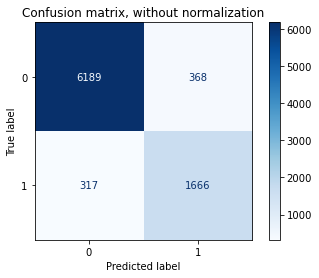

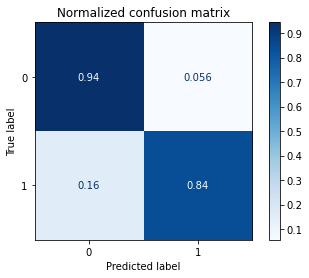

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      6557
           1       0.82      0.84      0.83      1983

    accuracy                           0.92      8540
   macro avg       0.89      0.89      0.89      8540
weighted avg       0.92      0.92      0.92      8540



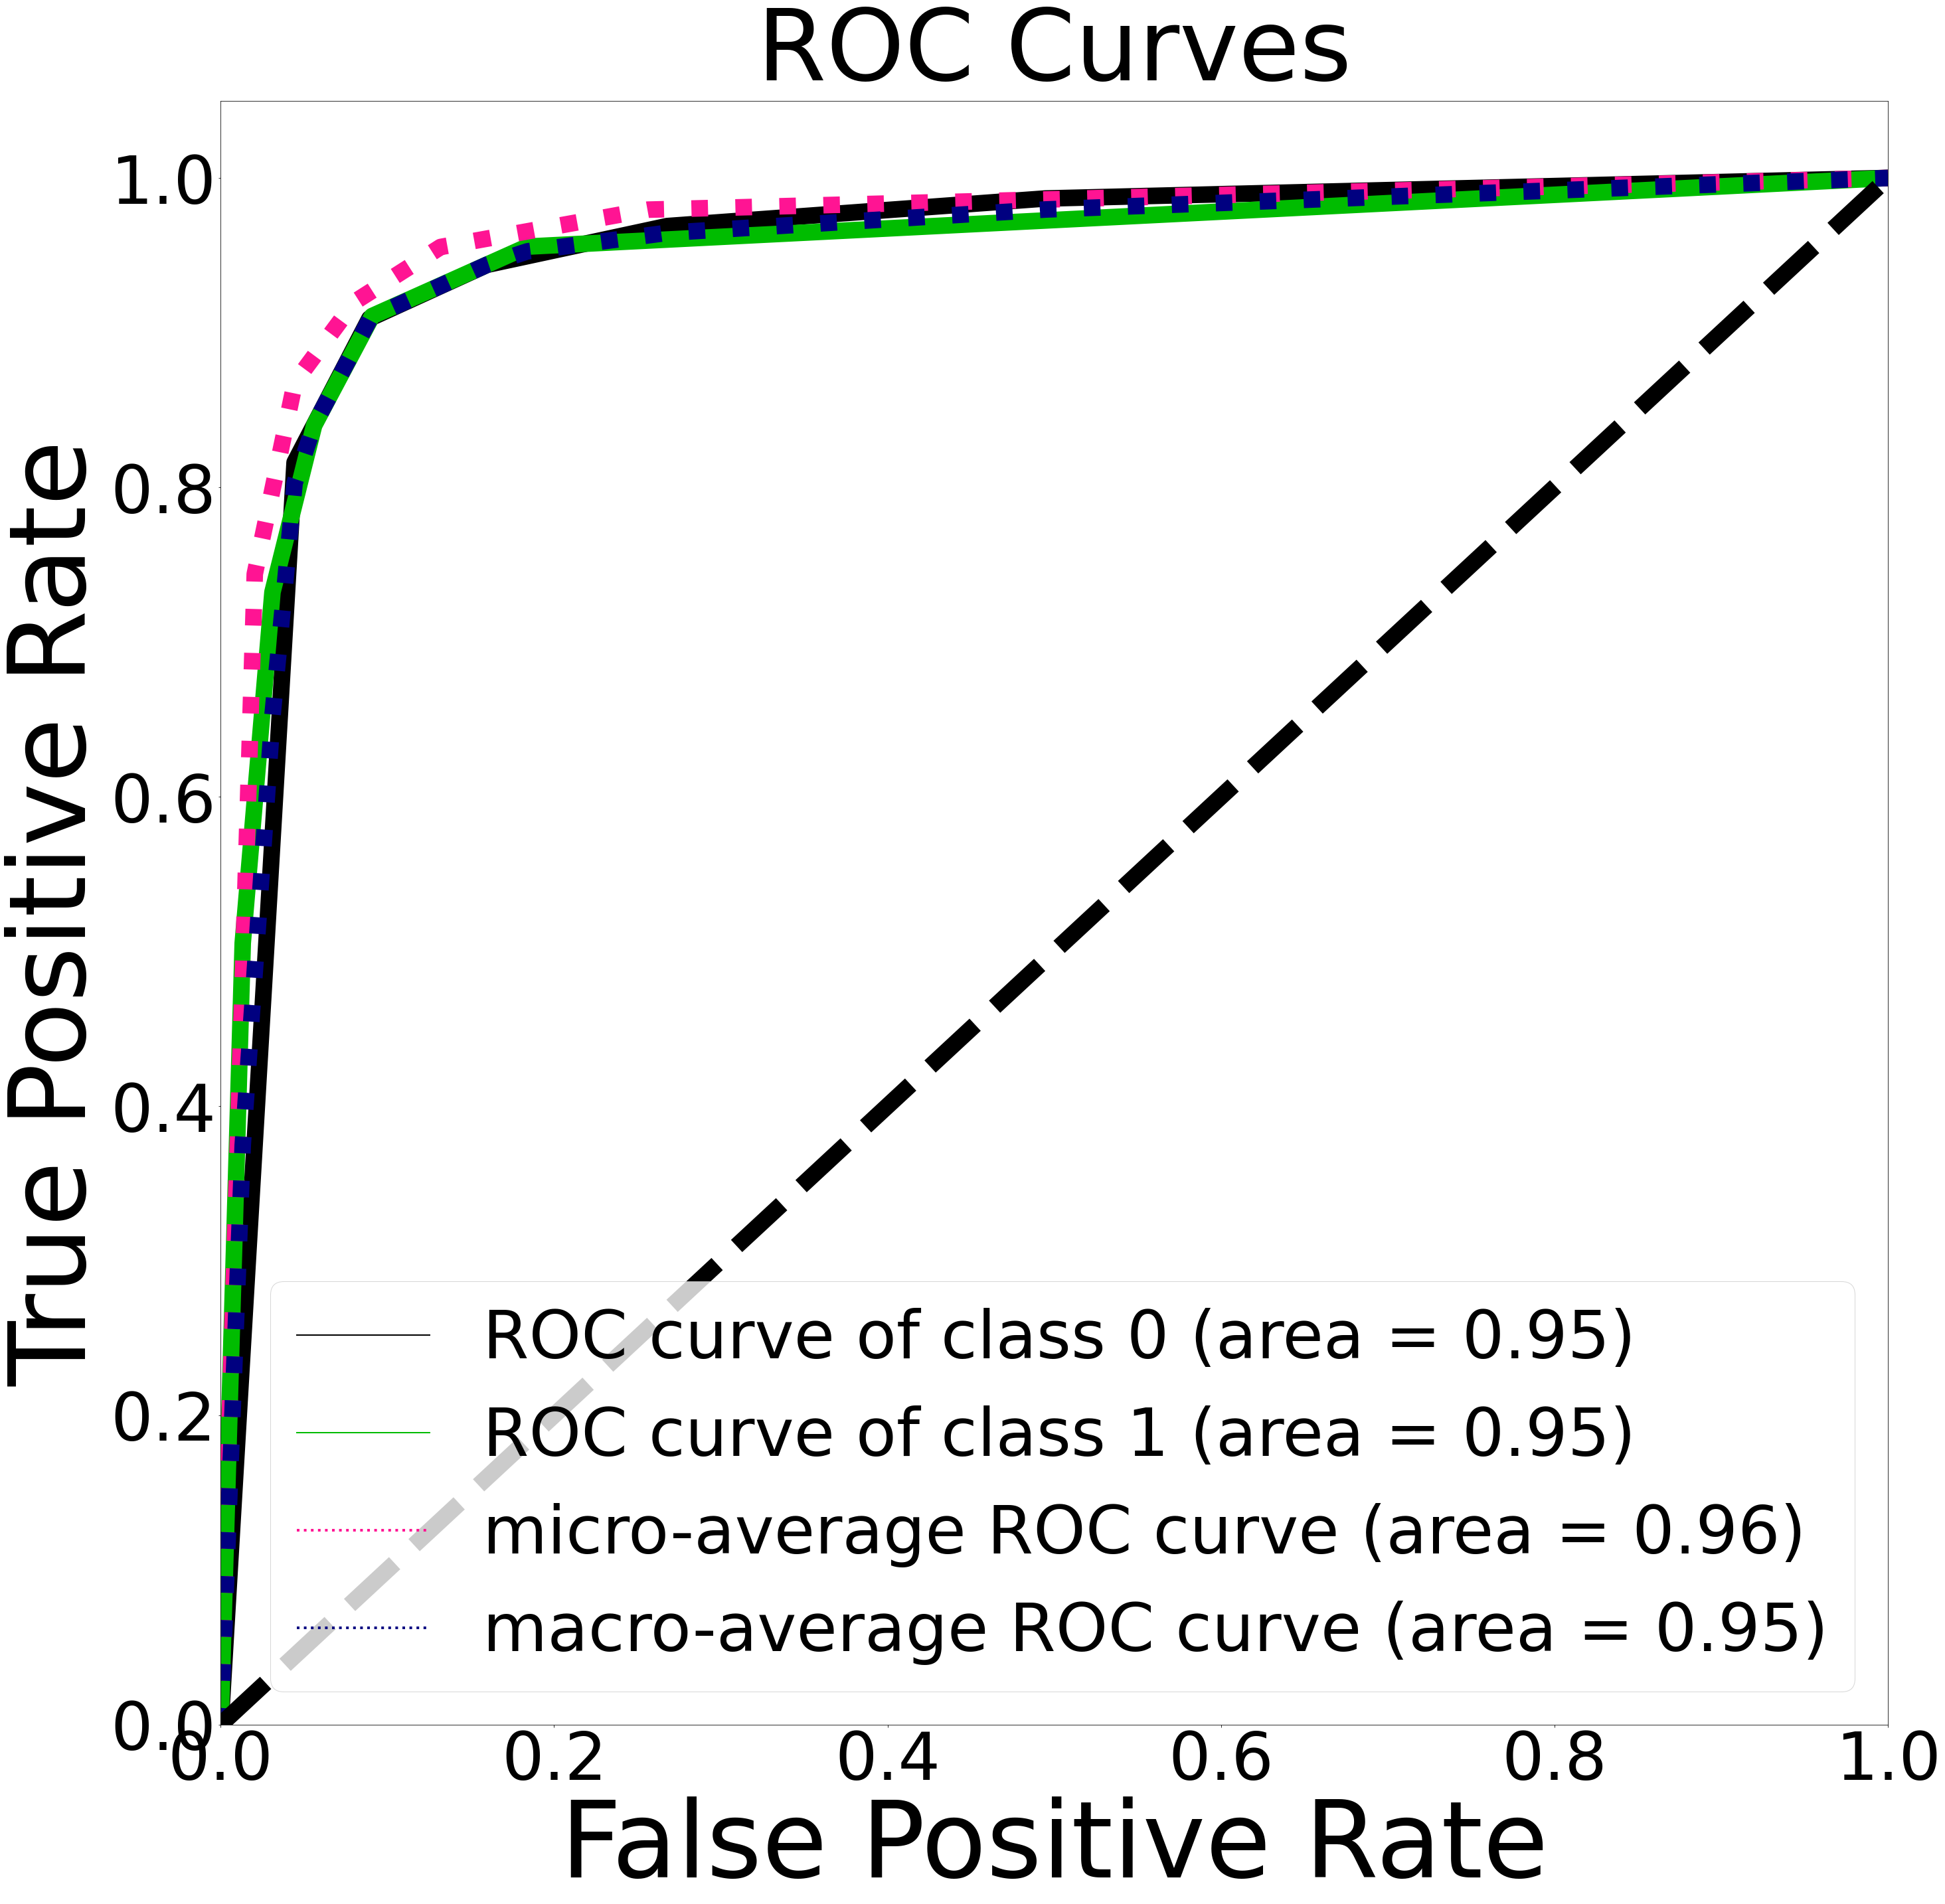

Average precision-recall score Random forest: 0.73


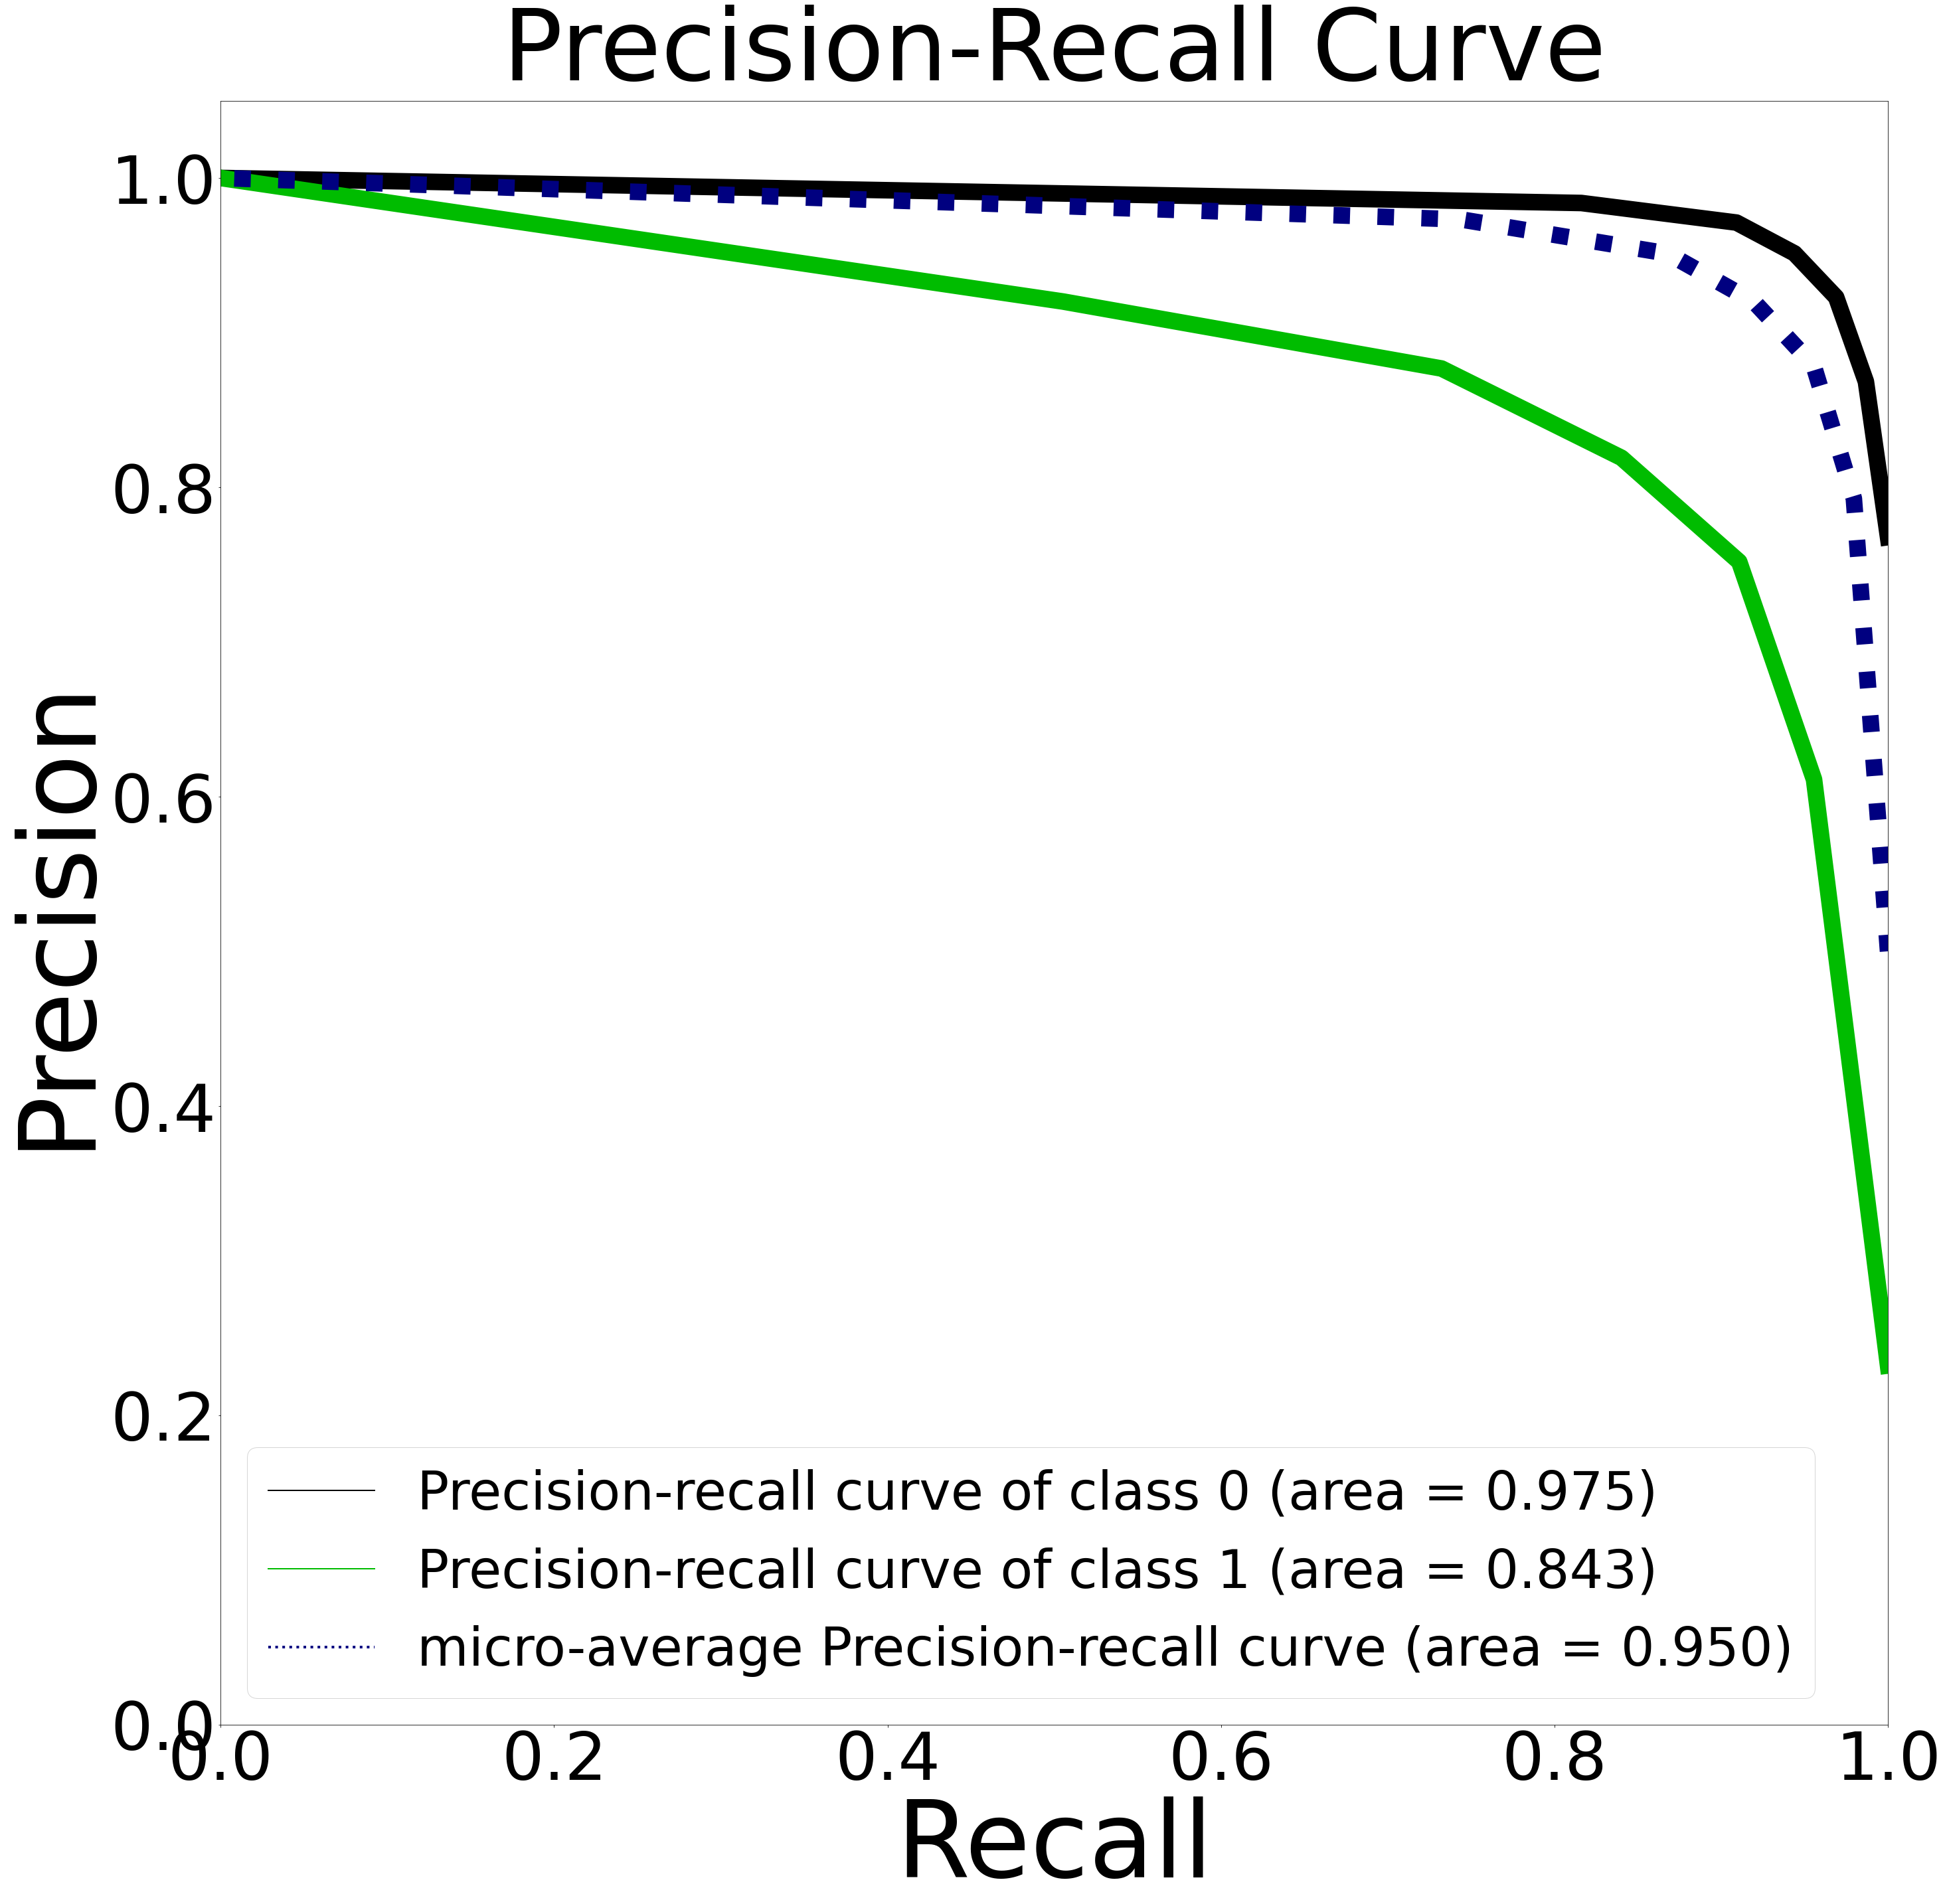

In [7]:
#KNN Classifier best cluster
neighbour = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
y_predict_KNN = neighbour.predict(X_val)
print("Test set Accuracy for k 5 = " , accuracy_score(y_val, y_predict_KNN))
plot_graphs(neighbour,X_val,y_val, y_predict_KNN)

In [7]:
#Random Forest Classifier Classifier Testing
md =0
while md < 1000:
    md = md+100
    championsTree = RandomForestClassifier(n_estimators = md)
    championsTree.fit(X_train,y_train)
    predict_tree = championsTree.predict(X_val)
    print("Random Forests's Accuracy for Tress = ", md , ":" , accuracy_score(y_val, predict_tree))

Random Forests's Accuracy for Tress =  100 : 0.9228337236533958
Random Forests's Accuracy for Tress =  200 : 0.922599531615925
Random Forests's Accuracy for Tress =  300 : 0.922248243559719
Random Forests's Accuracy for Tress =  400 : 0.923536299765808
Random Forests's Accuracy for Tress =  500 : 0.9228337236533958
Random Forests's Accuracy for Tress =  600 : 0.921311475409836
Random Forests's Accuracy for Tress =  700 : 0.9223653395784543
Random Forests's Accuracy for Tress =  800 : 0.9227166276346604
Random Forests's Accuracy for Tress =  900 : 0.9230679156908665
Random Forests's Accuracy for Tress =  1000 : 0.9218969555035129


Minimum value for Trees that improves results = 400
Confusion matrix, without normalization
[[6242  315]
 [ 335 1648]]
Normalized confusion matrix
[[0.95195974 0.04804026]
 [0.16893596 0.83106404]]


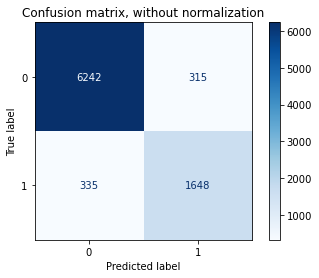

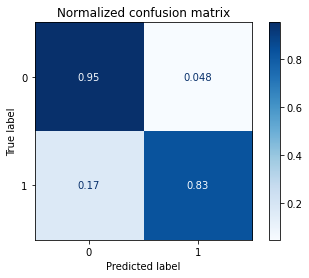

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6557
           1       0.84      0.83      0.84      1983

    accuracy                           0.92      8540
   macro avg       0.89      0.89      0.89      8540
weighted avg       0.92      0.92      0.92      8540



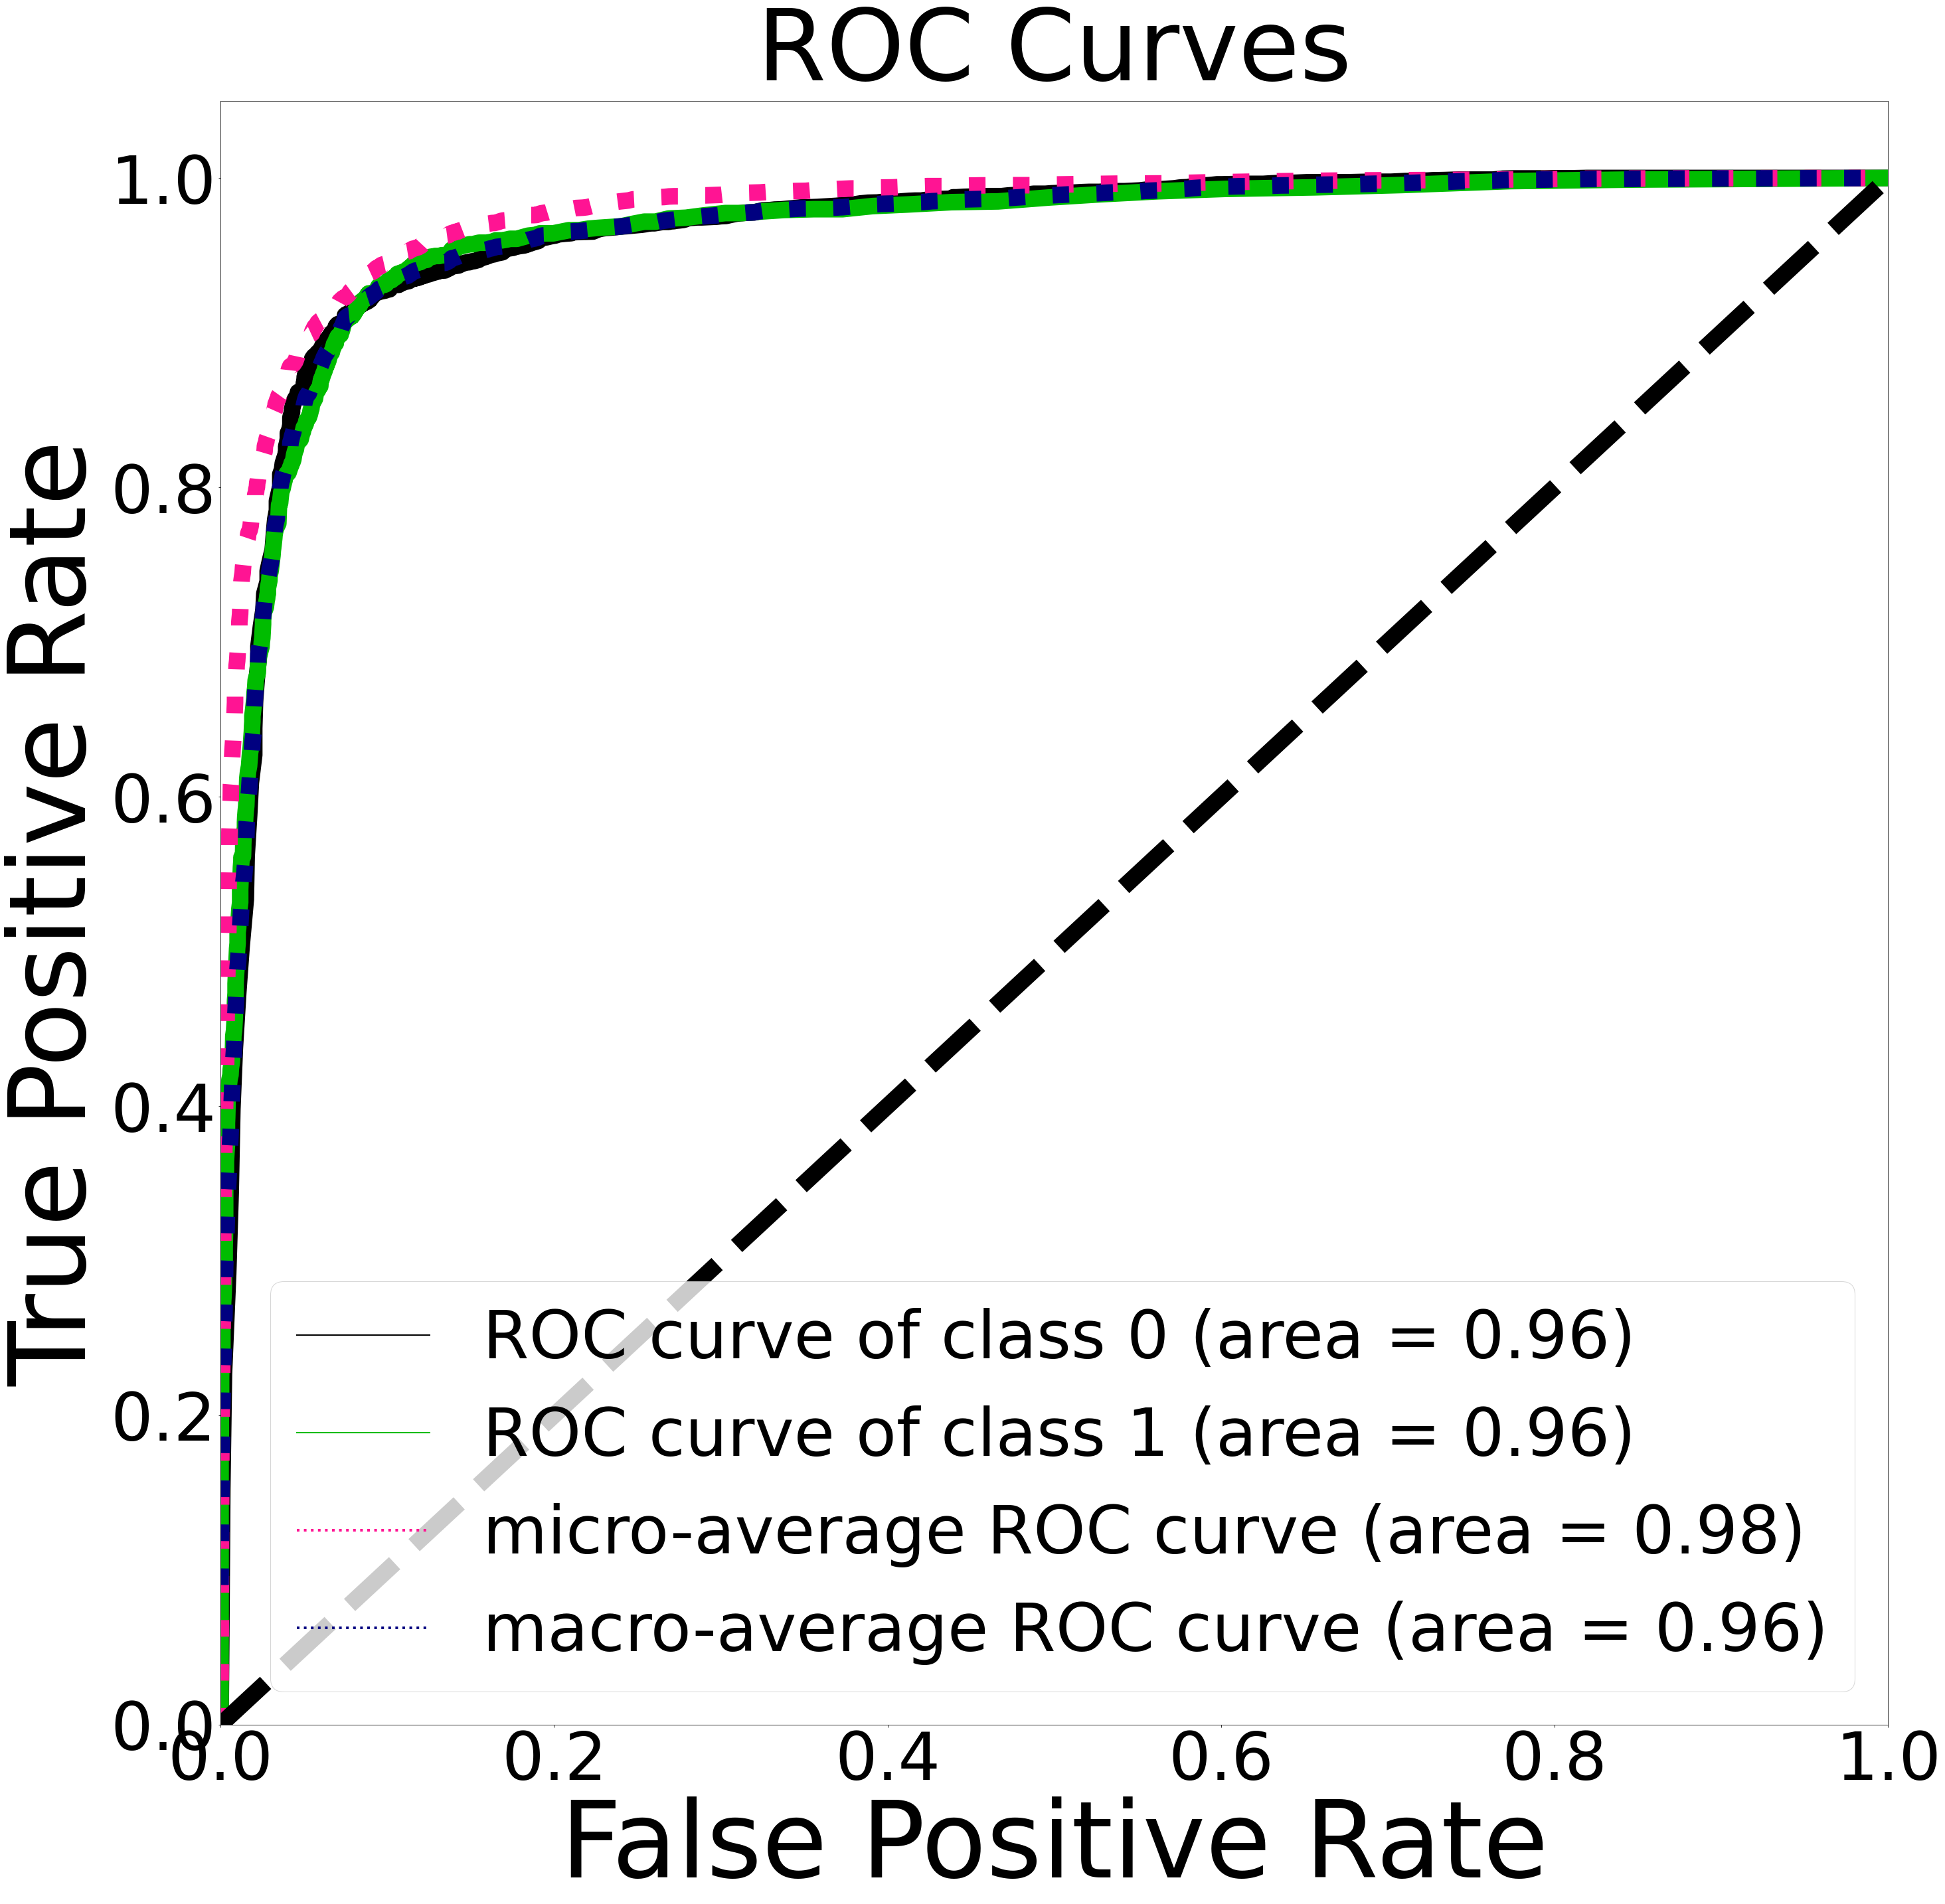

Average precision-recall score Random forest: 0.74


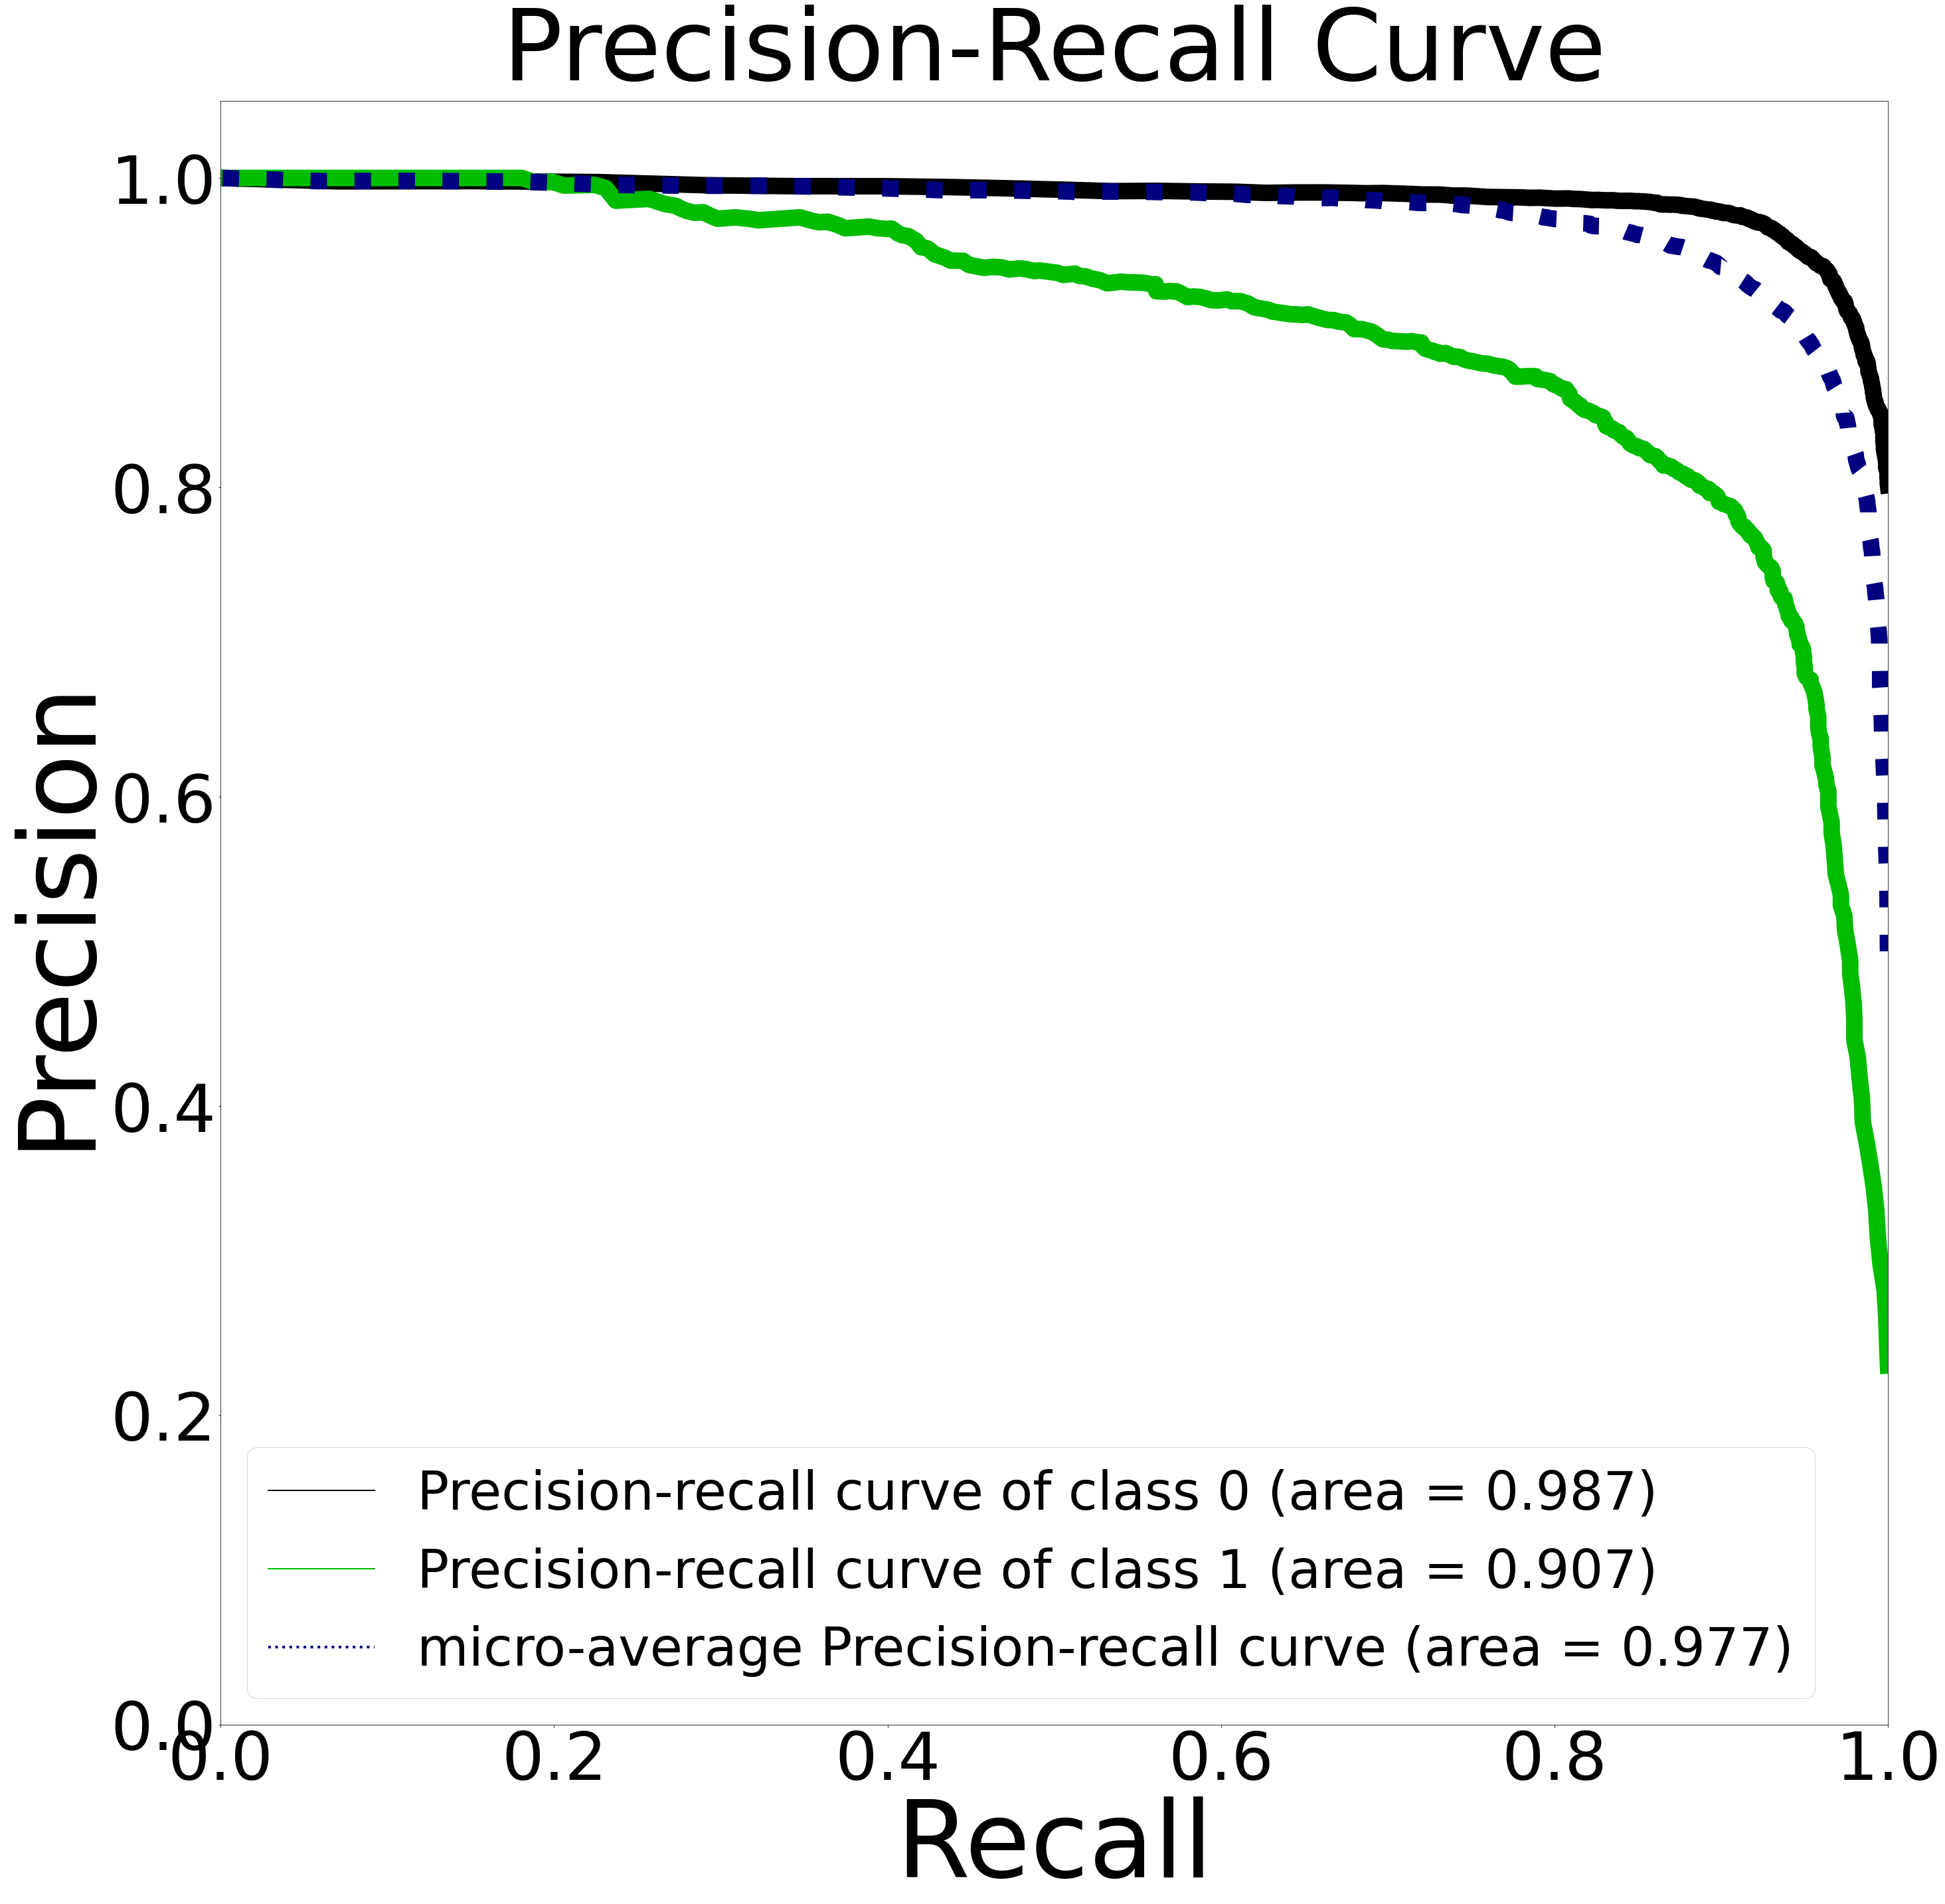

In [8]:
#Random Forest Classifier best Tree counts
print ("Minimum value for Trees that improves results = 400")
championsTree = RandomForestClassifier(n_estimators = 400)
championsTree.fit(X_train,y_train)
predict_tree = championsTree.predict(X_val)
plot_graphs(championsTree,X_val,y_val, predict_tree)

In [8]:
#Suport Vector Machine Testing
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Radial basis function:" , accuracy_score(y_val, y_svm))
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Linear:" , accuracy_score(y_val, y_svm))
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Polynomial:" , accuracy_score(y_val, y_svm))
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Sigmoid:" , accuracy_score(y_val, y_svm))

Support vector machine accuracy for Radial basis function: 0.9101873536299766
Support vector machine accuracy for Linear: 0.892271662763466
Support vector machine accuracy for Polynomial: 0.8640515222482436
Support vector machine accuracy for Sigmoid: 0.7134660421545668


As best score provided with Radial we will train it in the same.
Support vector machine accuracy Best Kernel score : 0.9162763466042154
Confusion matrix, without normalization
[[6099  458]
 [ 257 1726]]
Normalized confusion matrix
[[0.93015098 0.06984902]
 [0.12960161 0.87039839]]


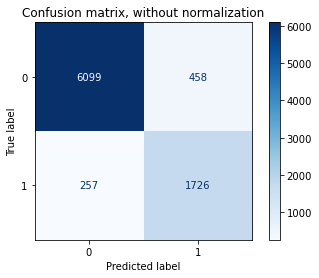

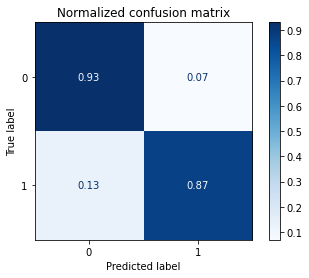

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      6557
           1       0.79      0.87      0.83      1983

    accuracy                           0.92      8540
   macro avg       0.87      0.90      0.89      8540
weighted avg       0.92      0.92      0.92      8540



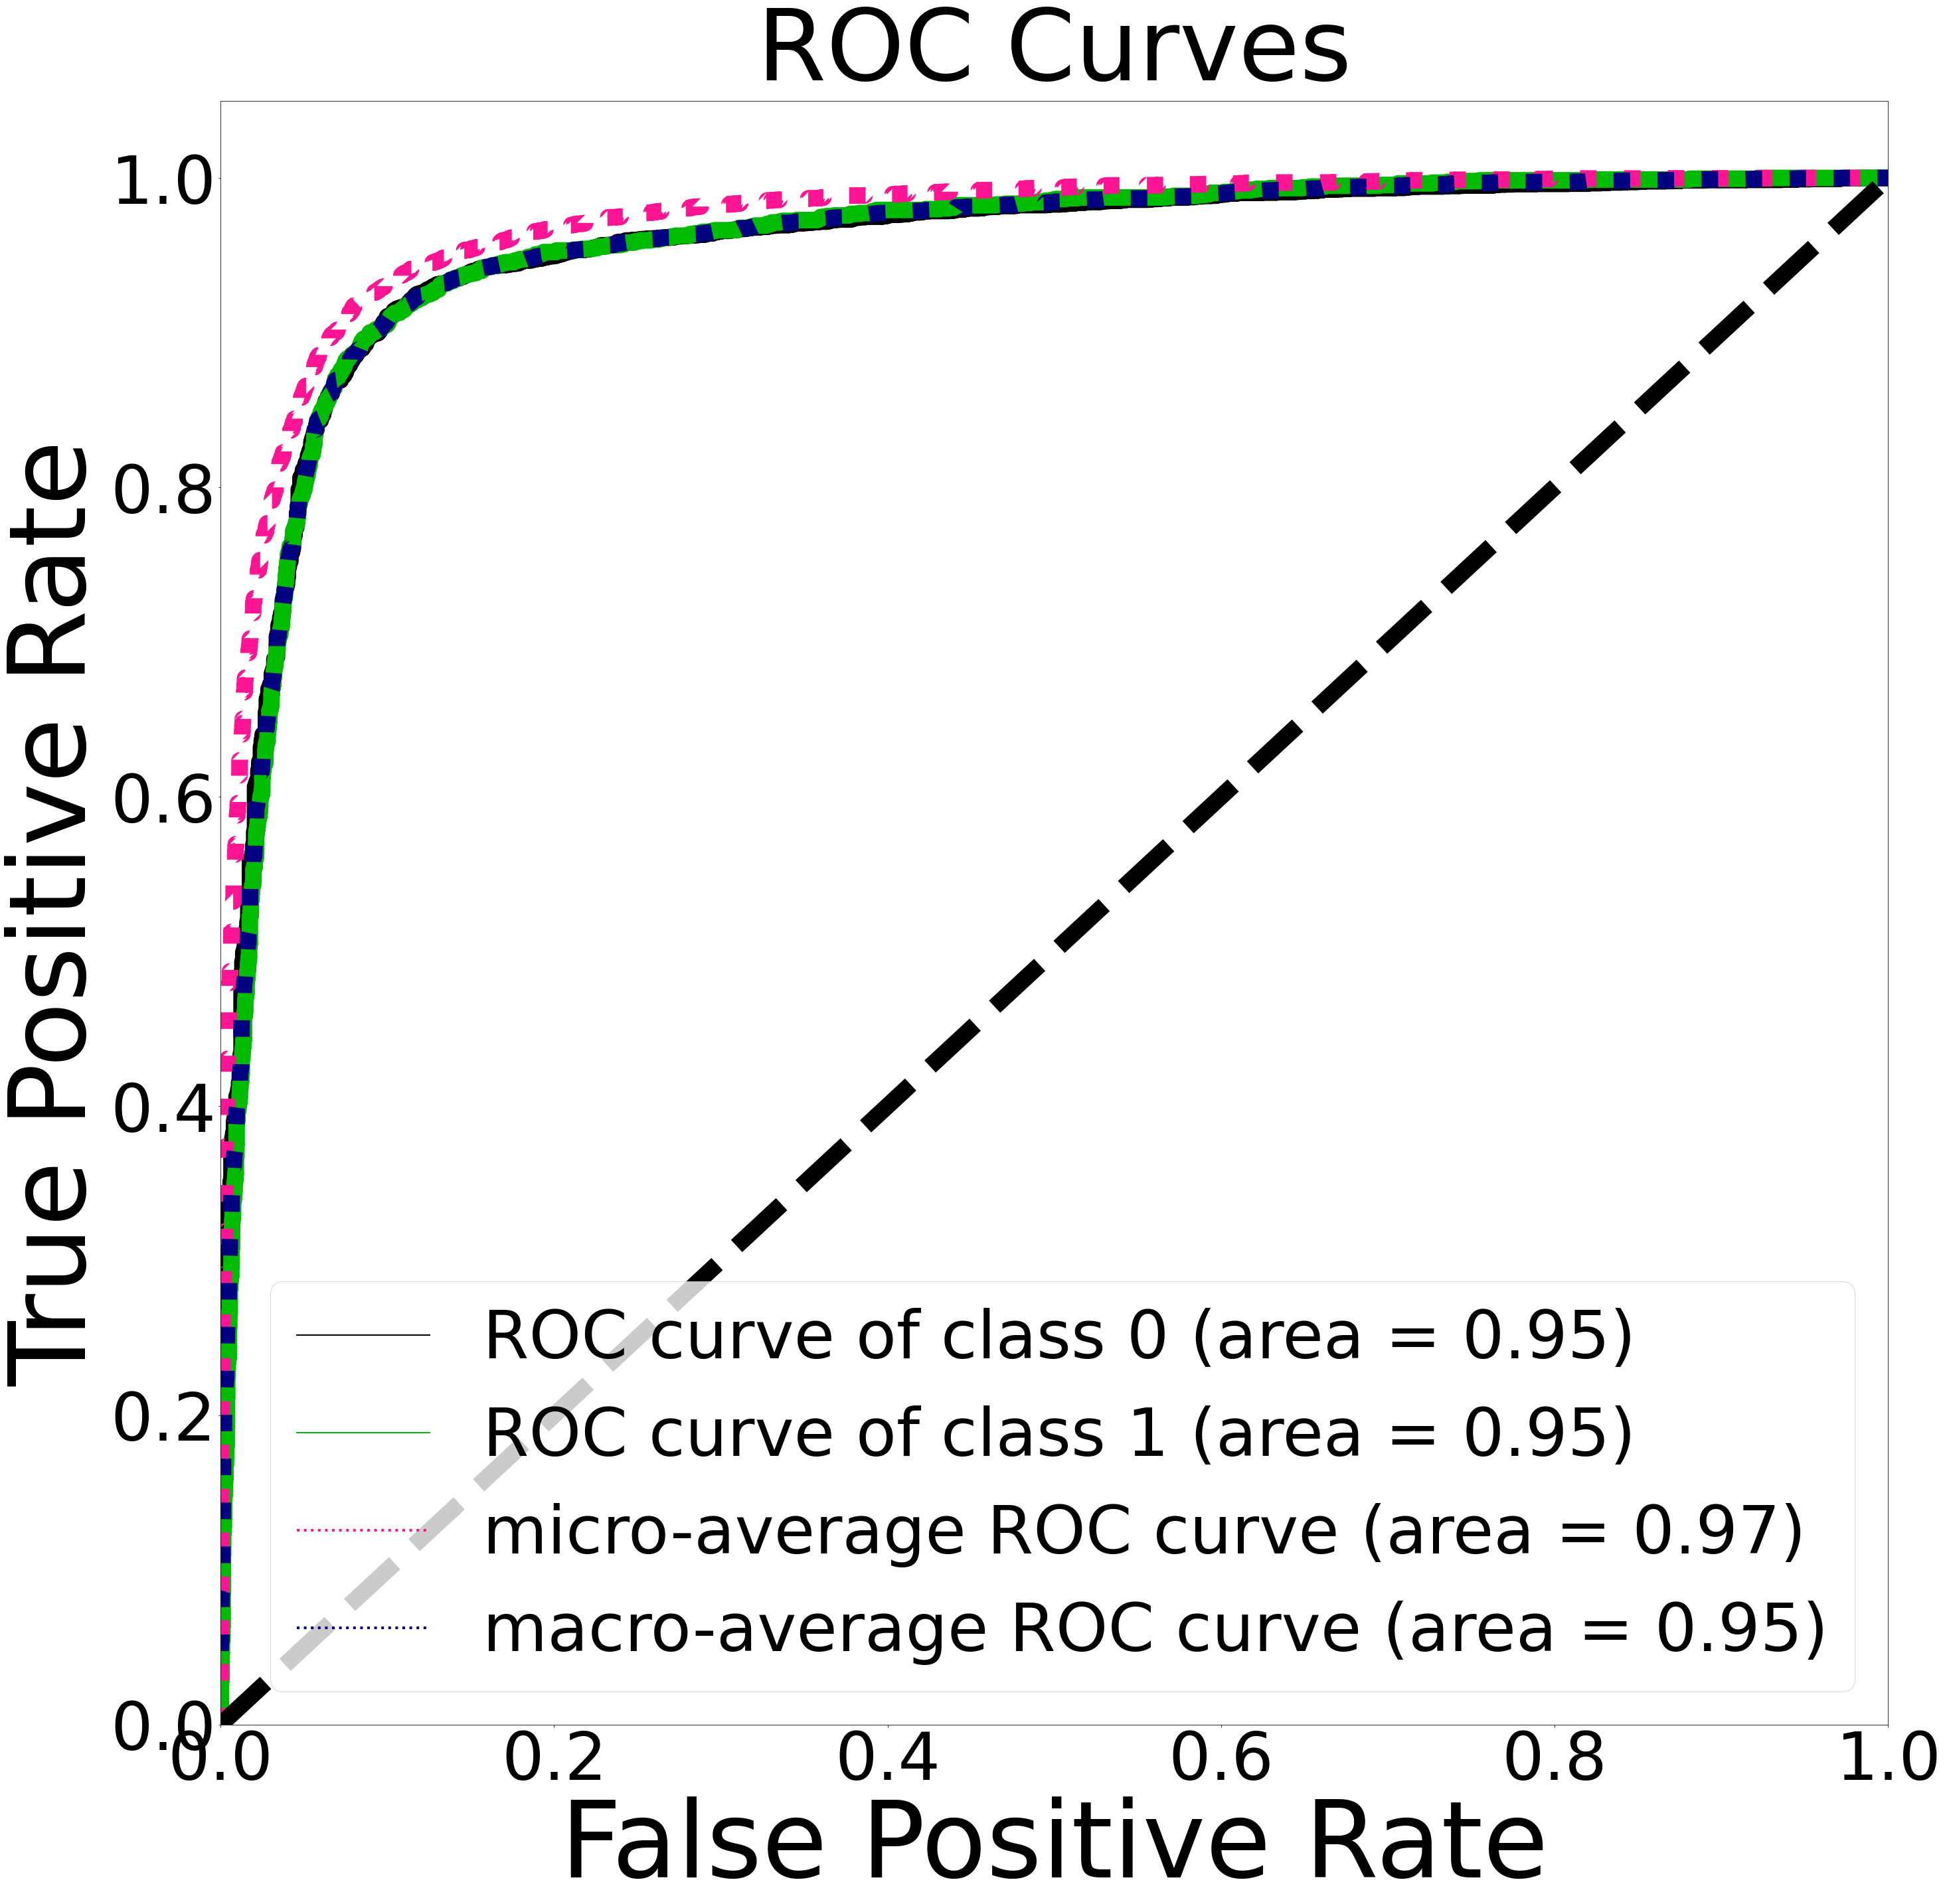

Average precision-recall score Random forest: 0.72


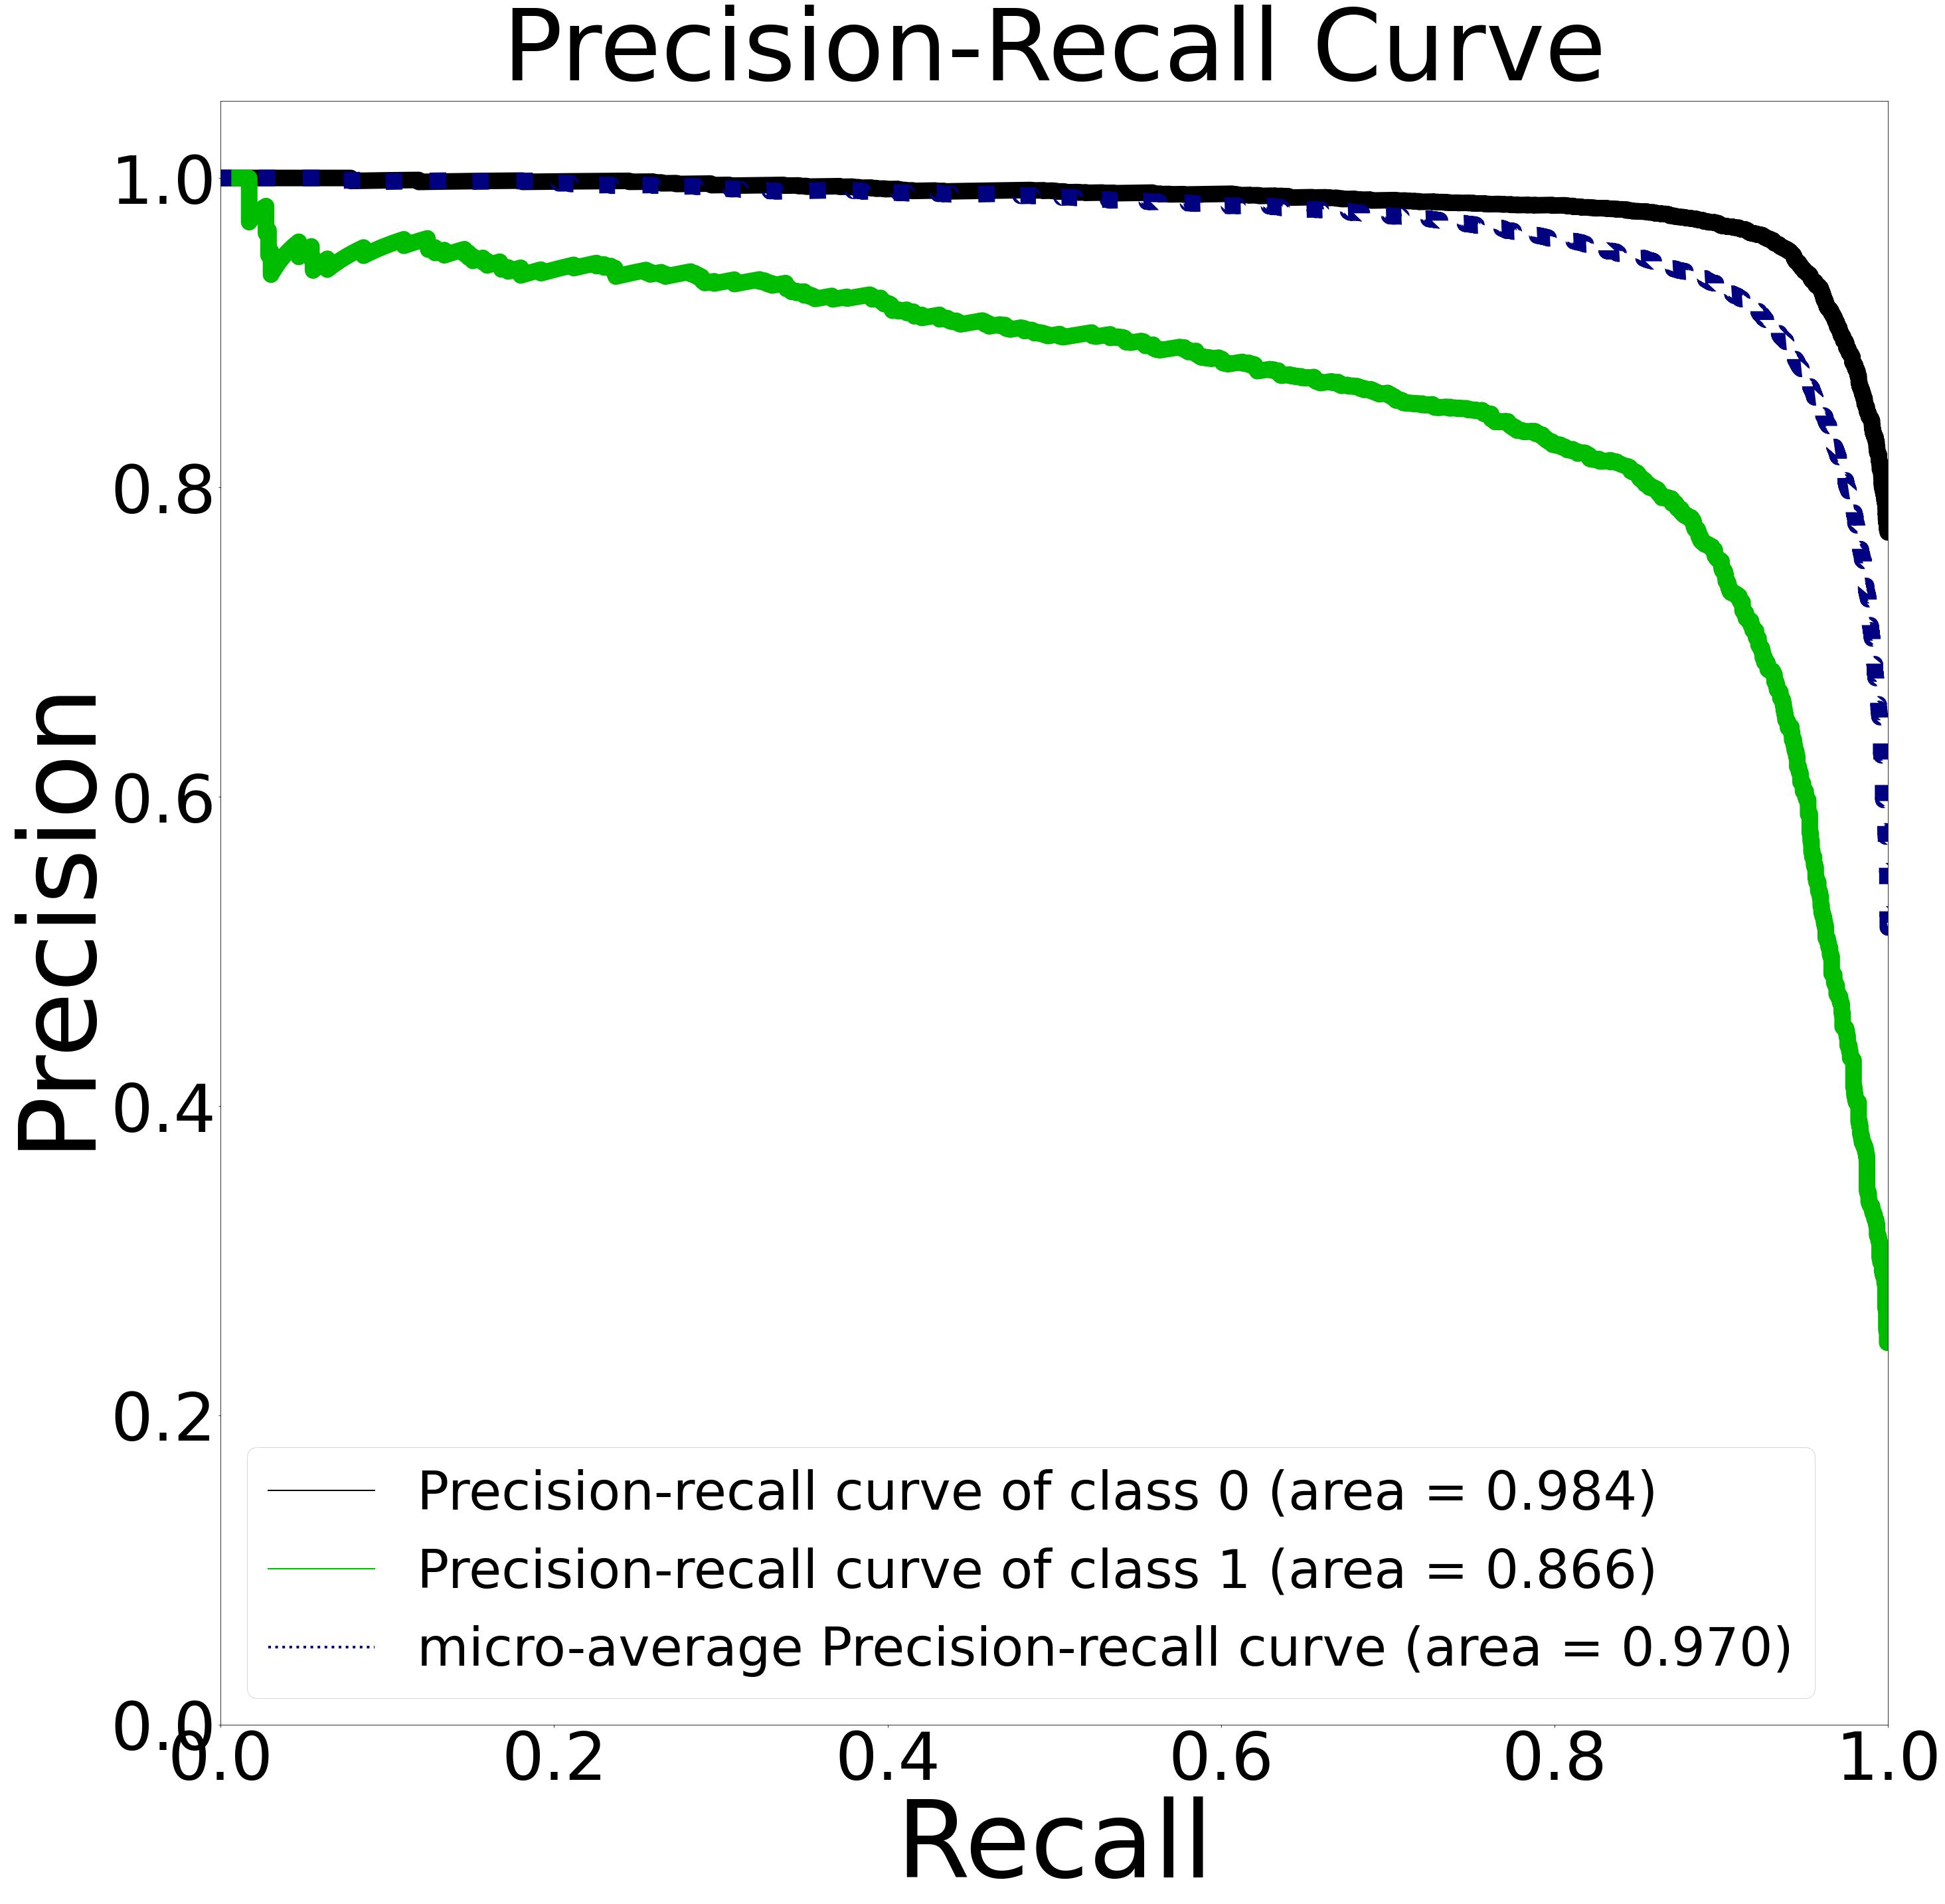

In [9]:
#SVM best Transforming method
print("As best score provided with Radial we will train it in the same.")
clf = svm.SVC(kernel='rbf',probability=True)
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy Best Kernel score :" , accuracy_score(y_val, y_svm))
plot_graphs(clf,X_val,y_val, y_svm)

In [12]:
#Neural Network Classifier Testing
neuro = MLPClassifier(learning_rate='constant',max_iter=400)
neuro.fit(X_train, y_train)
y_neuro = 0
y_neuro = neuro.predict(X_val)
print("MLPC accuracy for Constant Learning:" , accuracy_score(y_val, y_neuro))
neuro = MLPClassifier(learning_rate='invscaling',max_iter=400)
neuro.fit(X_train, y_train)
y_neuro = 0
y_neuro = neuro.predict(X_val)
print("MLPC accuracy for invscaling Learning:" , accuracy_score(y_val, y_neuro))
neuro = MLPClassifier(learning_rate='adaptive',max_iter=400)
neuro.fit(X_train, y_train)
y_neuro = 0
y_neuro = neuro.predict(X_val)
print("MLPC accuracy for adaptive Learning:" , accuracy_score(y_val, y_neuro))

MLPC accuracy for Constant Learning: 0.9193208430913349
MLPC accuracy for invscaling Learning: 0.9215456674473068
MLPC accuracy for adaptive Learning: 0.9197892271662763


Confusion matrix, without normalization
[[6216  341]
 [ 329 1654]]
Normalized confusion matrix
[[0.94799451 0.05200549]
 [0.16591024 0.83408976]]


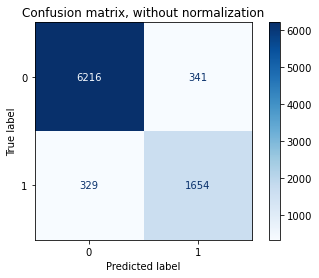

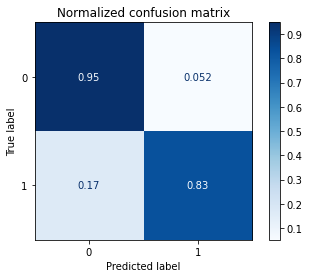

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6557
           1       0.83      0.83      0.83      1983

    accuracy                           0.92      8540
   macro avg       0.89      0.89      0.89      8540
weighted avg       0.92      0.92      0.92      8540



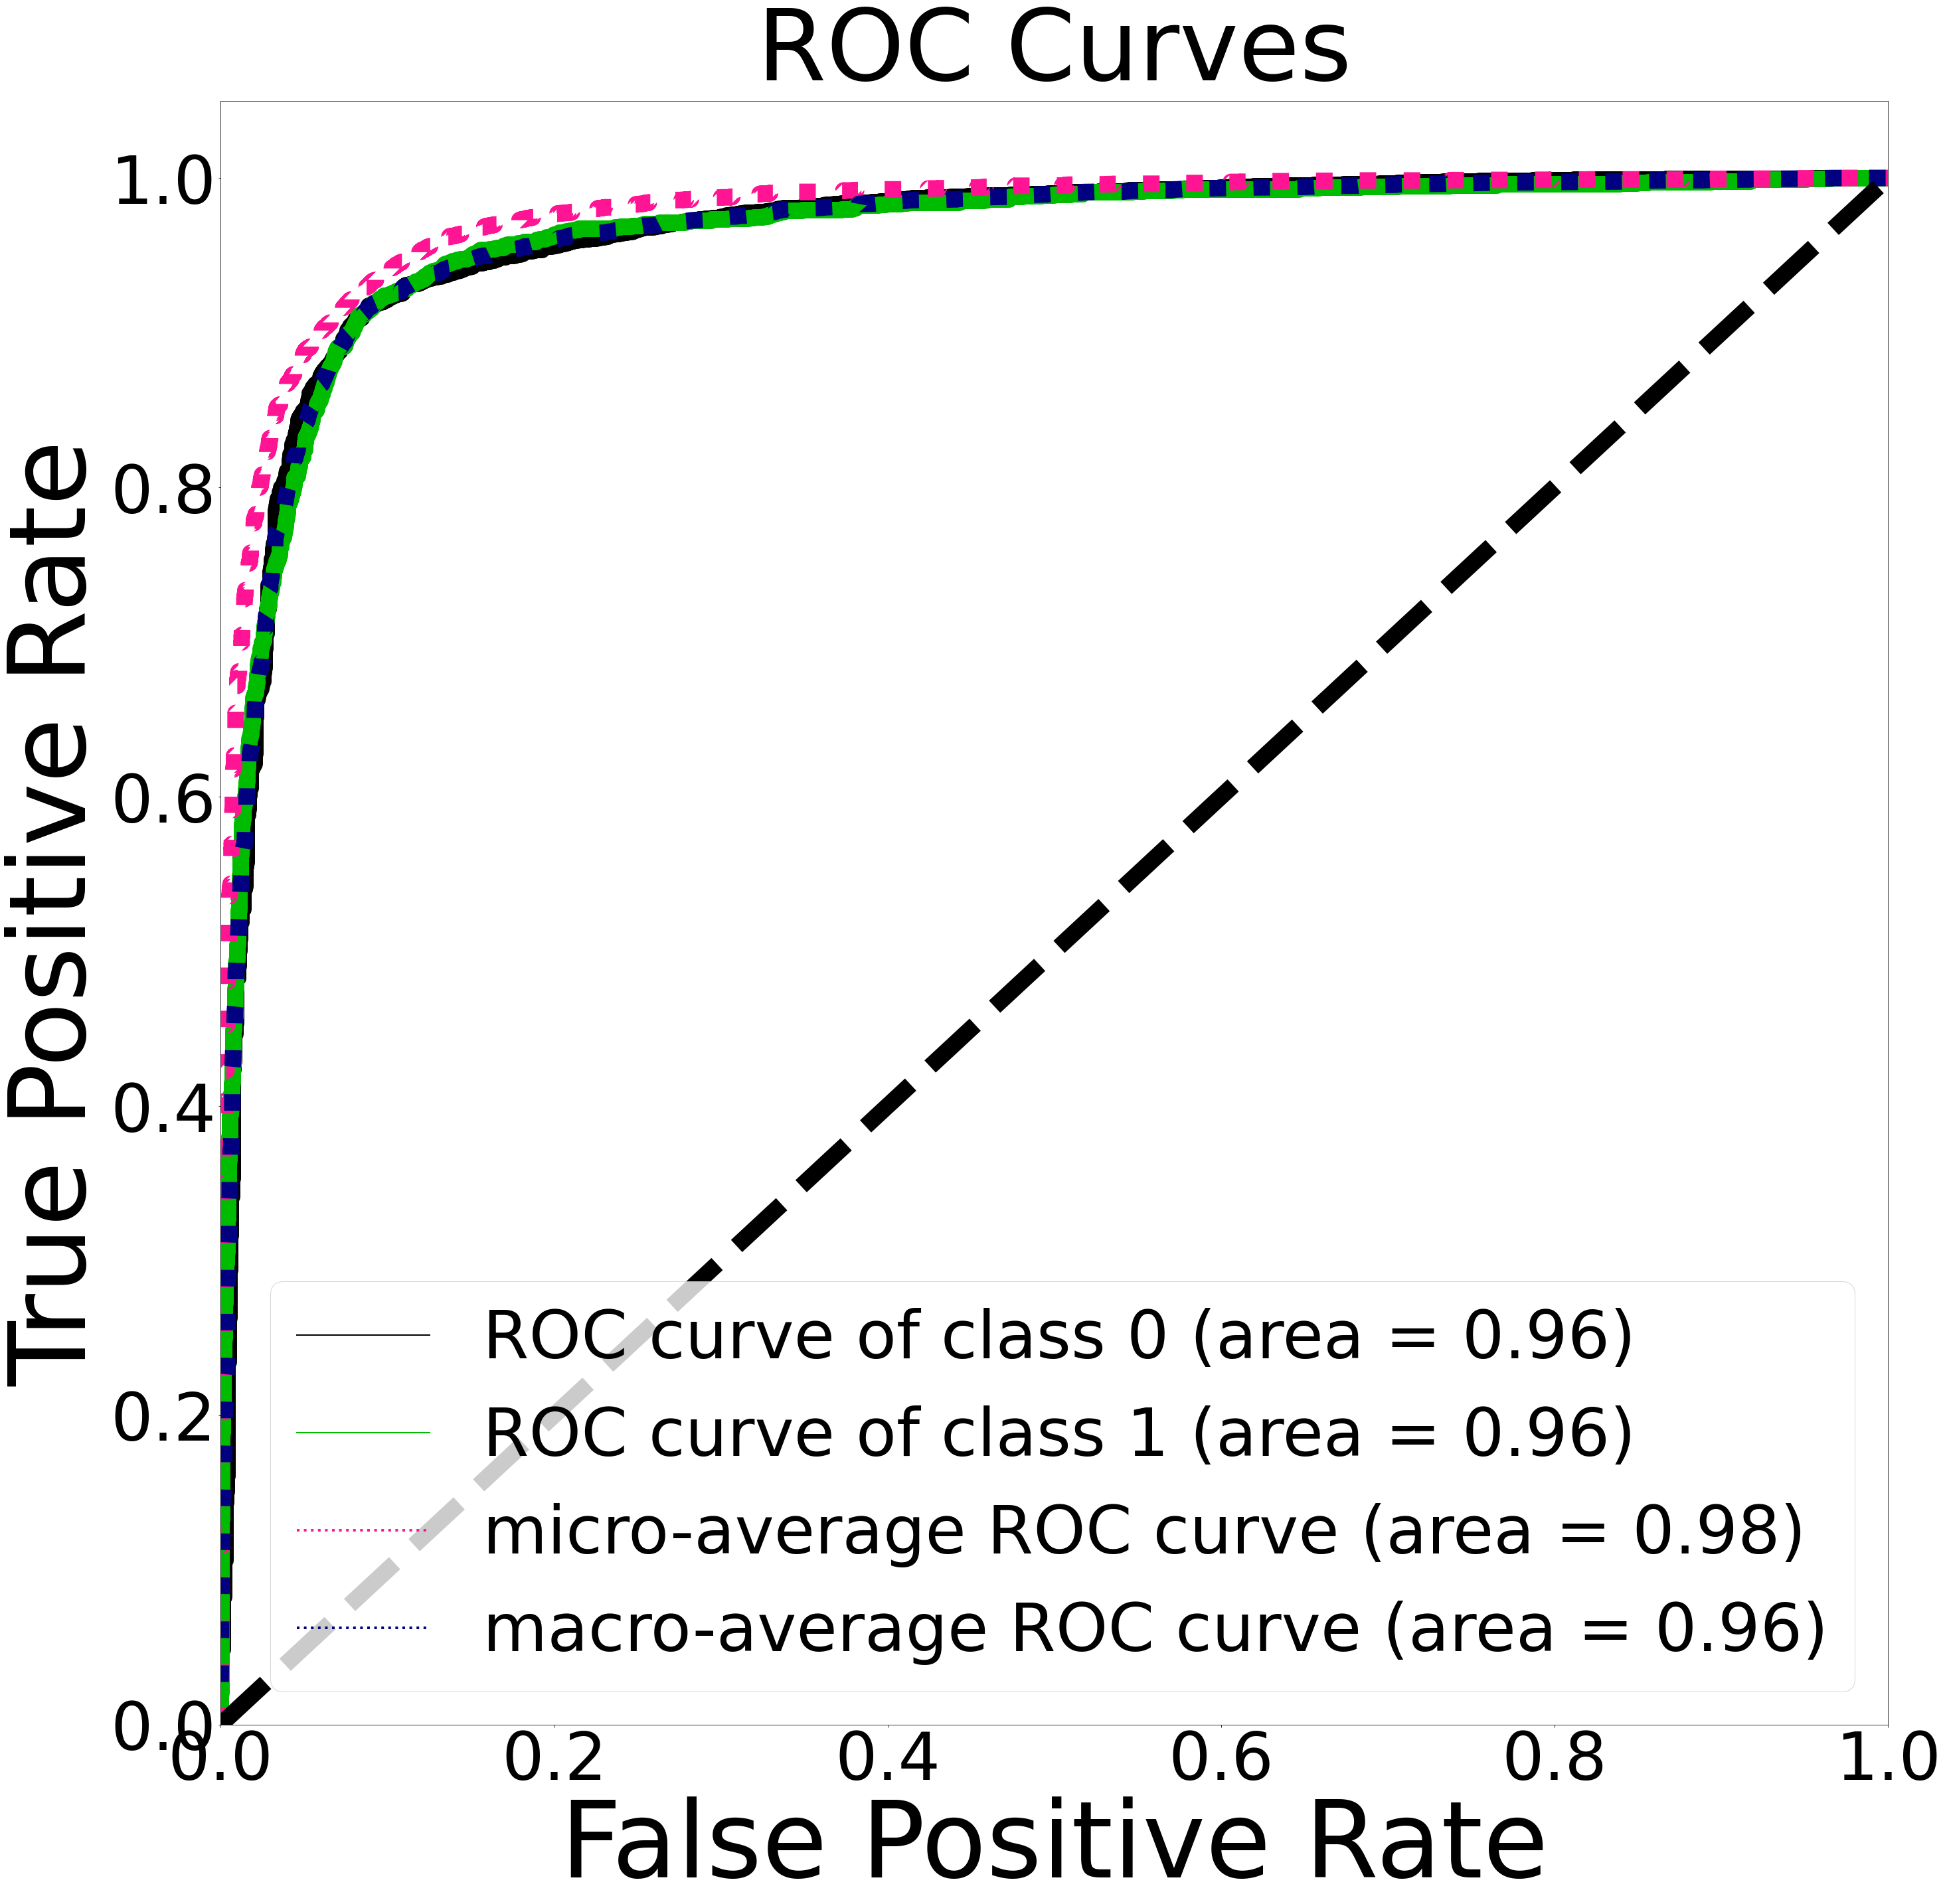

Average precision-recall score Random forest: 0.73


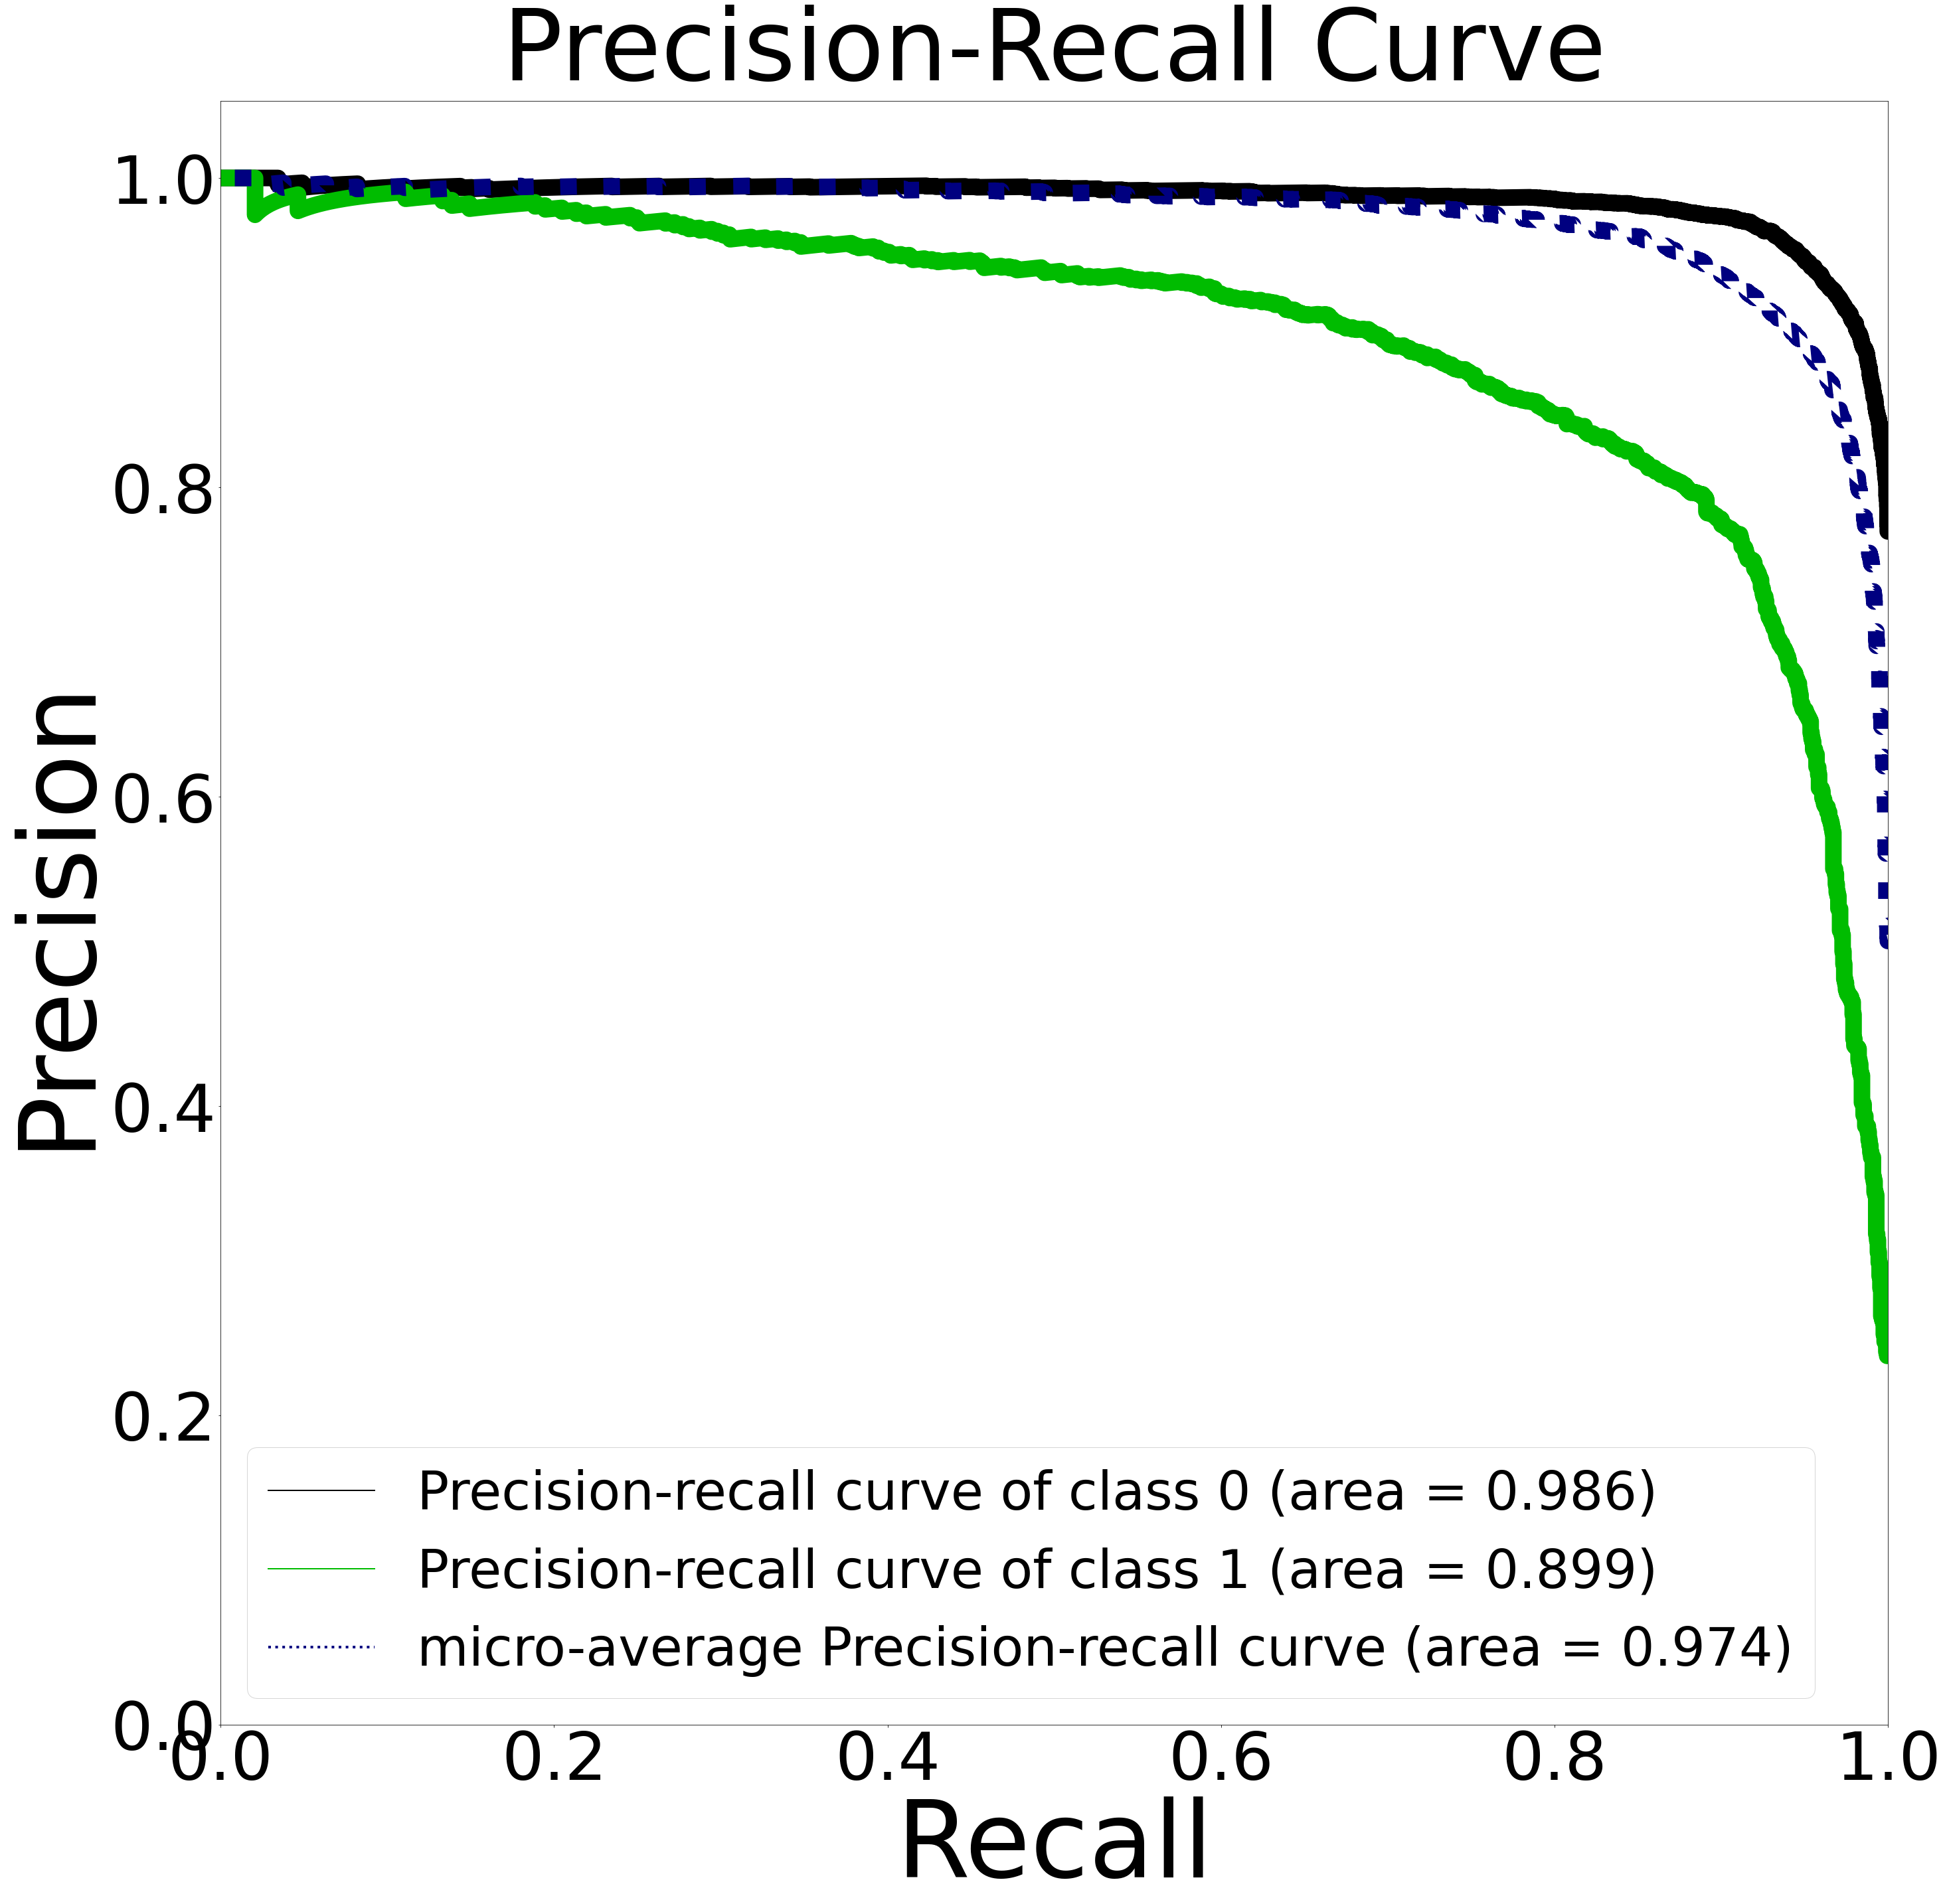

In [10]:
#Neural Network Classifier Best learning rate
neuro = MLPClassifier(learning_rate='invscaling',max_iter=400)
neuro.fit(X_train, y_train)
y_neuro = 0
neuropredict = neuro.predict(X_val)
plot_graphs(neuro,X_val,y_val, neuropredict)